In [1]:
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
s1 = Series([5, 6, 3, 8, 10, 6, 8, 1, 5, 7, 3, 4, 9, 4, 3, 3, 5])
s1

0      5
1      6
2      3
3      8
4     10
5      6
6      8
7      1
8      5
9      7
10     3
11     4
12     9
13     4
14     3
15     3
16     5
dtype: int64

In [13]:
print(s1.mean())
print(s1.median())
print(s1.mode())

5.294117647058823
5.0
0    3
dtype: int64


In [15]:
print(s1.max() - s1.min())

9


In [4]:
s2 = s1.value_counts()
s2

3     4
5     3
8     2
6     2
4     2
10    1
9     1
7     1
1     1
dtype: int64

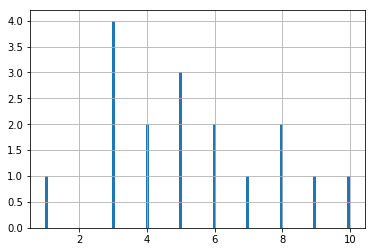

In [7]:
s1.hist(bins=100)
plt.show()

In [9]:
s3 = Series([12000, 12500, 15000, 13000, 12000, 20000, 12500, 80000, 13000, 13000, 15500, 16000, 95000])
s3

0     12000
1     12500
2     15000
3     13000
4     12000
5     20000
6     12500
7     80000
8     13000
9     13000
10    15500
11    16000
12    95000
dtype: int64

In [14]:
print(s3.mean())
print(s3.median())
print(s3.mode())

25346.153846153848
13000.0
0    13000
dtype: int64


In [16]:
print(s3.max() - s3.min())

83000


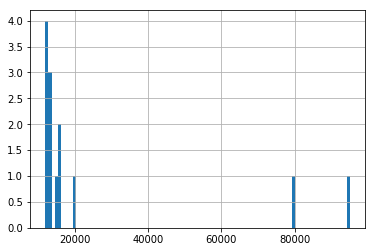

In [11]:
s3.hist(bins=100)
plt.show()

In [24]:
s4 = s3.sort_values()
s5 = s4.quantile([0.25, 0.50, 0.75])
print(s4)
print(s5)
q1, q3 = s5[0.25], s5[0.75]
iqr = q3 - q1
iqr

0     12000
4     12000
1     12500
6     12500
3     13000
8     13000
9     13000
2     15000
10    15500
11    16000
5     20000
7     80000
12    95000
dtype: int64
0.25    12500.0
0.50    13000.0
0.75    16000.0
dtype: float64


3500.0